# 9. 스택(Stacks)
- 자료 (data element)를 보관할 수 있는 선형 구조
- 단, 넣을 때에는 한쪽 끝에서 밀어 넣어야 하고(pust), 꺼낼때에는 같은 쪽에서 뽑아 꺼내야 함(pop)
> 후입선출(LIFO - Last In First Out) 특징을 가지는 선형 자료구조

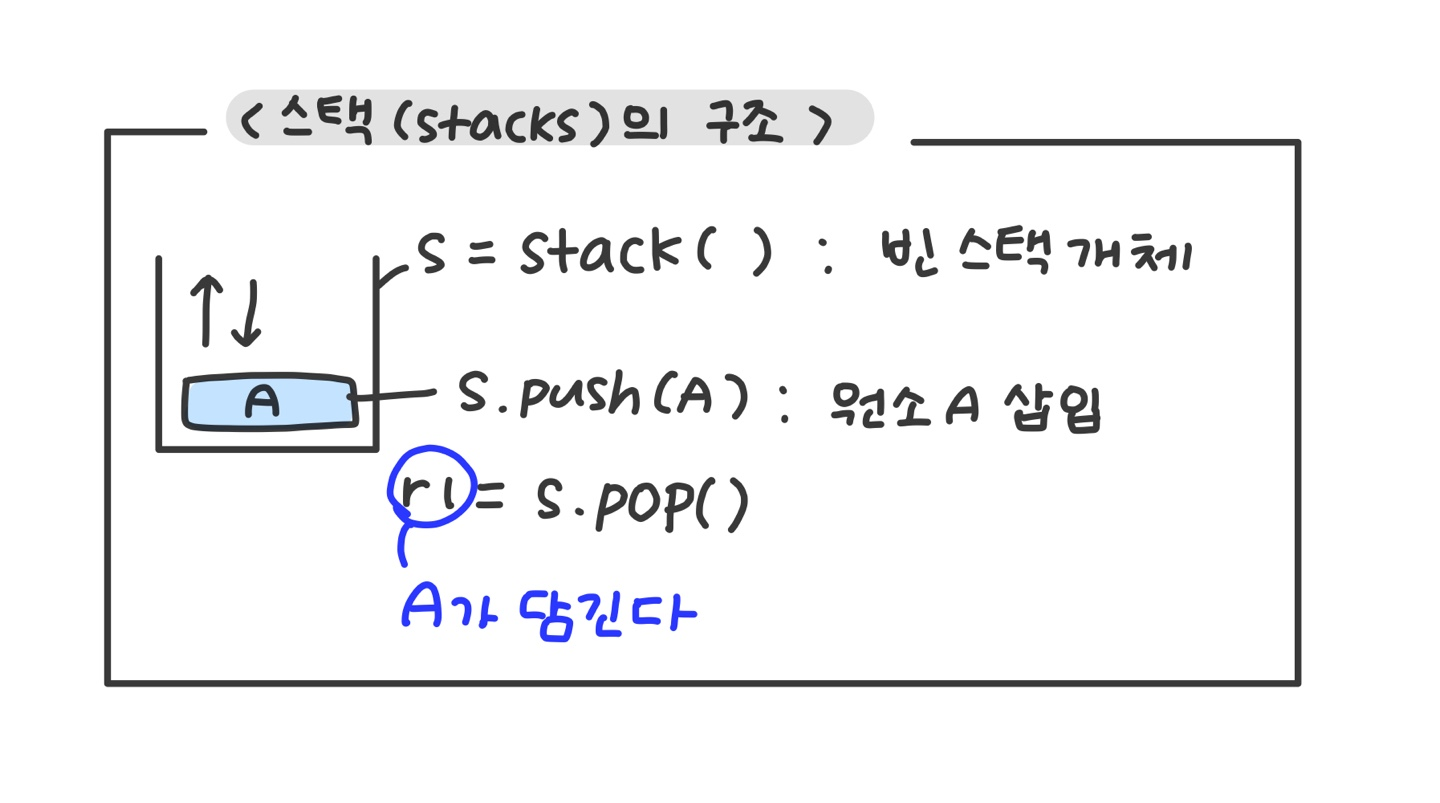


## 1) 스택에서 발생하는 오류

1. 비어있는 스택에서 데이터 원소를 꺼내려 할 때 ( = 스택 언더플로우)

2. 꽉 찬 스택에 데이터 원소를 넣으려 할 때 ( = 스택 오버플로우)

-----

## 2) 스택을 구현하는 방법   

1. 배열(array)를 이용한 구현 : python의 리스트와 매서드를 이용    

2. 연결리스트(linked list)를 이용 : 양방향 연결리스트를 이용   

------


## 3) 스택의 연산
- size() : 현재 데이터에 들어있는 원소의 수
- isEmpty() : 현재 스택이 비어있는지를 판단
- push(x) : 데이터 원소 x를 스택에 추가
- pop() : 스택의 맨 위에 저장된 원소를 제거
- peek() : 스택의 꼭대기인 마지막으로 push된 원소를 반환

In [3]:
# 파이썬 리스트를 활용해 구현
class ArrayStack:
    def size(self):
        return len(self.data)
    
    def isEmpty(self):
        return self.size() == 0
    
    def push(self, item):
        self.data.append(item)
        
    def pop(self):
        return self.data.pop()
    
    def peek(self):
        return self.data[-1]

In [4]:
# 양방향 연결리스트로 구현

class Node:
    def __init__(self, item):
        self.data = item
        self.prev = None
        self.next = None  # 양방향으로 연결
        
class DoublyLinkedList:
    def __init__(self, item):
        self.nodeCount = 0
        self.head = Node(None)      # dummy node를 만든다!
        self.tail = Node(None)
        
        # 연결리스트 본격 구현(연결 노드가 두개인 리스트)
        self.head.prev = None
        self.head.next = self.tail
        self.tail.prev = self.head
        self.tail.next = None

In [6]:
class LinkedListStack:
    def __init__(self):
        self.data = DoublyLinkedList()
        
    def size(self):
        return self.data.getLength()
    
    def isEmpty(self):
        return self.size()==0
    
    def push(self, item):
        node = Node(item)
        self.data.insertAt(self, size() + 1, node)
    
    def pop(self):
        return self.data.popAt(self.size())
    
    def peek(self):
        return self.data.getAt(self.size()).data   # 맨 마지막 데이터를 리턴

In [9]:
# 기존 스택 라이브러리
!pip install pythonds

In [11]:
from pythonds.basic.stack import Stack
s = Stack()
dir(s)    # 스택이 제공하는 매서드

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'isEmpty',
 'items',
 'peek',
 'pop',
 'push',
 'size']

## 4) 수식의 괄호 유효성 결과
소괄호, 중괄호, 대괄호가 알맞게 쓰였는지 판단

- 수식을 왼쪽부터 한글자씩 읽어서, 여는 괄호(, {, [ 등을 만나면 스택에 푸시   
-  닫는 괄호를 만나면?
> 스택이 비어있으면 올바르지 않은 수식     
> 스택에서 pop, 쌍을 이루는 여는 괄호인지 검사 > 맞지 않으면 올바르지 않은 수식   
- 끝까지 검사한 후, 스택이 비어있어야 올바른 수식

In [12]:
def solution(expr):
    match = {')' : '(', 
             '}':'{', 
             ']':'['
            }         # 맞는 괄호를 딕셔너리로 지정
    
    S = ArrayStack()
    for c in expr:
        if c in '({[':    # 여는 괄호를 스택에 넣음
            S.push(c)
            
        elif c in match:  # 닫힌 괄호(key)일 때
            
            if S.isEmpty():  # 만약 스택이 비어있으면 False
                return False
            
            else:
                t = S.pop()
                if t != match[c]:  # 스택에 담긴 괄호(열린괄호)와 닫힌 괄호가 같지 않으면
                    return False
                
    return S.isEmpty()   # 끝까지 검사한 후 스택이 비어있어야 올바른 수식